# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [0]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [3]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

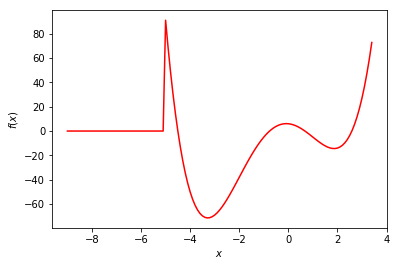

In [4]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The layer will have 3 layers (with a ReLU activation function). You will use the Adam optimizer. You must compute the loss at each epoch.

In [5]:
import torch

H1 = 40 # number of hidden neurons
H2 = 20
H3 = 20

Niter = 5*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    #for i in range(N):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    


999 3.9074015617370605
1999 2.499197483062744
2999 2.8203115463256836
3999 0.10281402617692947
4999 0.9155620336532593


Plot the training error as a function of the epoch

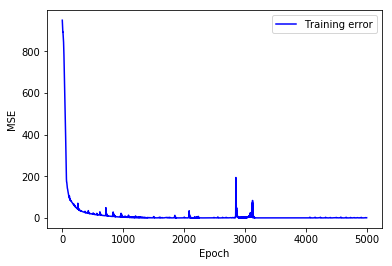

In [6]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

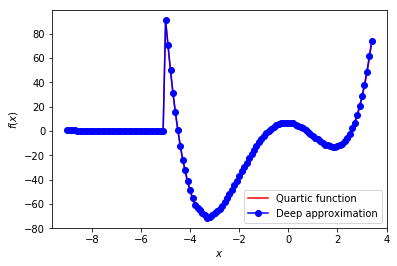

In [7]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

How many parameters?

In [0]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [9]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



Print all the parameters (just for seeing them)

In [10]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.5625],
        [-0.6598],
        [ 0.9627],
        [-1.1967],
        [ 0.1083],
        [ 0.0704],
        [ 0.8061],
        [ 0.6940],
        [ 0.4227],
        [ 0.2330],
        [-0.0940],
        [-0.3435],
        [ 0.2272],
        [ 0.0968],
        [-0.1258],
        [-0.4261],
        [-0.3497],
        [ 0.1306],
        [ 0.4184],
        [-1.3451],
        [ 0.4967],
        [ 0.2952],
        [ 0.6234],
        [-0.9148],
        [ 0.8009],
        [ 0.1450],
        [-0.6778],
        [ 0.1123],
        [ 0.3935],
        [ 0.8042],
        [ 0.4691],
        [ 0.1763],
        [ 0.4097],
        [ 0.3972],
        [-0.6451],
        [ 0.3638],
        [-1.1203],
        [-0.8236],
        [ 0.6080],
        [-0.2686]], requires_grad=True)
Parameter containing:
tensor([-1.6188, -1.8274, -0.5373, -2.5080, -0.5410, -0.5503, -0.1275, -1.7358,
         2.4014, -0.9438,  2.1633,  0.9273,  2.1319,  1.4341,  2.2990,  1.9313,
         1.8068

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [11]:
H1 = 500 # number of hidden neurons

Niter = 5*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    #for i in range(N):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    



999 96.19170379638672
1999 95.79957580566406
2999 95.67706298828125
3999 95.85133361816406
4999 95.62295532226562


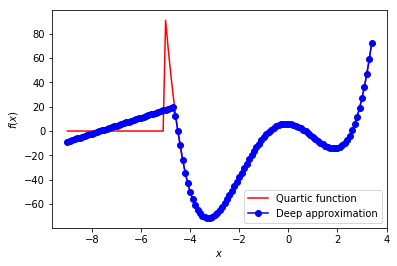

In [12]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [13]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 1501

